In [1]:
#매개변수를 갱신
#1. SGD
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in parmas.keys():
            params[key] -= self.lr * grads[key]

In [2]:
#모멘텀
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.itmes():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]
        

In [3]:
#학습률 감소 - AdaGrad :각각의 매개변수에 맞춤형 값을 만들어준다
#개별 매개변수에 적응적으로(adaptiv) 학습률을 조정하면서 학습진행
#과거의 기울기를 제곱하면서 계속 더해간다 
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


In [4]:
#Adam = AdaGrad + Momentum
#하이퍼파라미터의 '편향보정'이 진행된다
#먼소리일까?
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)


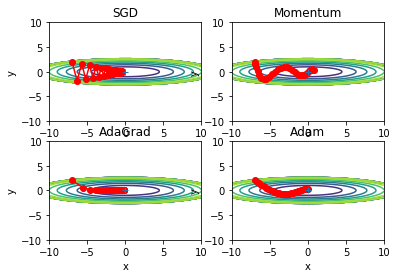

In [5]:
#비교
# coding: utf-8
import sys, os
sys.path.append(os.pardir) 
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.3182916331712424
Momentum:2.3179150229441174
AdaGrad:2.3513388762478487
Adam:2.2535604930942066
===========iteration:100===========
SGD:1.5677662066832798
Momentum:0.35481837360209667
AdaGrad:0.14677558061012982
Adam:0.20669569800573379
===========iteration:200===========
SGD:0.7598707310827004
Momentum:0.23728183237574385
AdaGrad:0.12071334346938861
Adam:0.15604912909054058
===========iteration:300===========
SGD:0.4929058686612827
Momentum:0.12922862304745406
AdaGrad:0.033017363005048435
Adam:0.09199206281012969
===========iteration:400===========
SGD:0.33439308377676646
Momentum:0.07784916589984382
AdaGrad:0.02643747088947662
Adam:0.04232013377502432
===========iteration:500===========
SGD:0.44107277099629516
Momentum:0.14483453349292505
AdaGrad:0.061589460025950664
Adam:0.08879727464133091
===========iteration:600===========
SGD:0.22616183300149123
Momentum:0.10130630804255747
AdaGrad:0.03360906270154479
Adam:0.08639939043271774
===========it

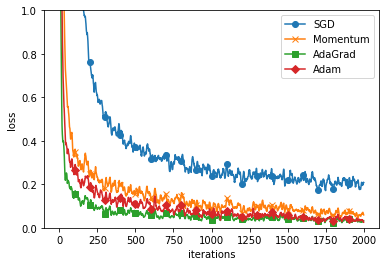

In [6]:
#Mnist 데이터 셋으로 본 갱신 방법 비교
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


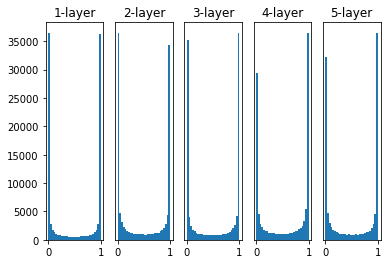

In [7]:
#은닉층 활성화 값들이 어떻게 변화하는지 보는 실험
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


#0 과 1에 치우쳐져있다
# = 기울기 소실 발생

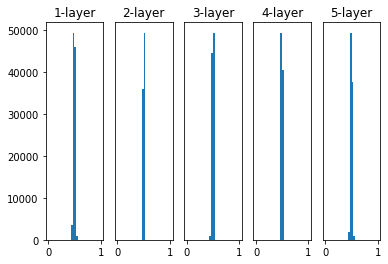

In [8]:

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


# 0.5 부근에 집중되어있다.
#다수의 뉴런이 같은 값을 출력하고 있다. 
#뉴런을 여러개 둔 의미가 없어진다.
#활성화 값들이 치우쳐지면 표현력이 제한된다.

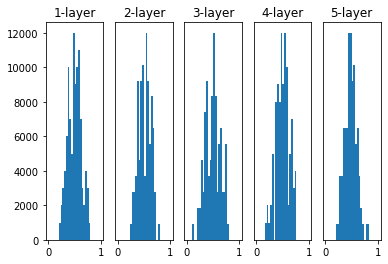

In [9]:

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#Xavier 초깃값을 사용한 케이스
#층이 깊어지면서 형태가 다소 읽으러지짖만 앞 케이스보다 넓게 분포됨을 확인 할 수 있었다.


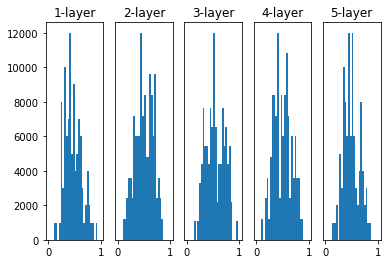

In [10]:

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

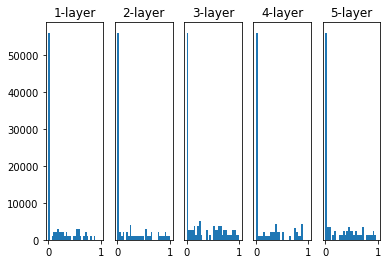

In [11]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    #Xavier 초깃값 : 초깃값의 표준편차가 1/ 루트n이 되도록 설정

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

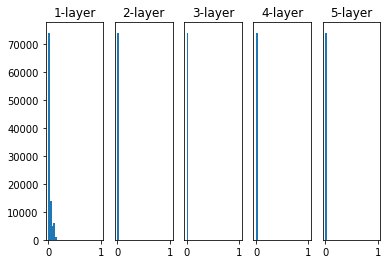

In [12]:

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수도 바꿔가며 실험해보자！
    
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

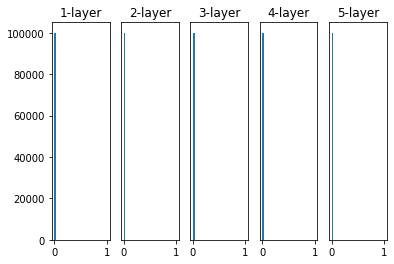

In [13]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.3025095988685305
Xavier:2.3076467254632247
He:2.4191068570441994
===========iteration:100===========
std=0.01:2.302102000643309
Xavier:2.2108859003565096
He:1.5132560944249833
===========iteration:200===========
std=0.01:2.2995728779875075
Xavier:2.060743825452543
He:0.7878055022273545
===========iteration:300===========
std=0.01:2.302610191468279
Xavier:1.667279892253343
He:0.44286082107361313
===========iteration:400===========
std=0.01:2.305370314779836
Xavier:1.2983167947840735
He:0.6016203452675886
===========iteration:500===========
std=0.01:2.2997462289867743
Xavier:0.7209106973901036
He:0.26083384495109874
===========iteration:600===========
std=0.01:2.299417727889027
Xavier:0.5979146281687306
He:0.30312761709895136
===========iteration:700===========
std=0.01:2.304235835157207
Xavier:0.5198782725013742
He:0.35181658650619296
===========iteration:800===========
std=0.01:2.2984939914571028
Xavier:0.48476382338626267
He:0.3584148029070

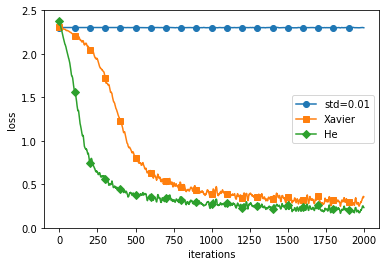

In [14]:
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()


#std = 0.01 때는 학습이 전혀 이뤄지지 않는다.
# 순전파때 너무 작은 값이 흐르기 때문.


============== 1/16 ==============
epoch:0 | 0.092 - 0.08


C:\Users\smaxt\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
C:\Users\smaxt\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\smaxt\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.09
epoch:2 | 0.097 - 0.118
epoch:3 | 0.097 - 0.13
epoch:4 | 0.097 - 0.148
epoch:5 | 0.097 - 0.168
epoch:6 | 0.097 - 0.195
epoch:7 | 0.097 - 0.211
epoch:8 | 0.097 - 0.22
epoch:9 | 0.097 - 0.231
epoch:10 | 0.097 - 0.237
epoch:11 | 0.097 - 0.262
epoch:12 | 0.097 - 0.282
epoch:13 | 0.097 - 0.297
epoch:14 | 0.097 - 0.301
epoch:15 | 0.097 - 0.324
epoch:16 | 0.097 - 0.329
epoch:17 | 0.097 - 0.343
epoch:18 | 0.097 - 0.35


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.375
============== 2/16 ==============
epoch:0 | 0.093 - 0.069


C:\Users\smaxt\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
C:\Users\smaxt\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.07
epoch:2 | 0.097 - 0.092
epoch:3 | 0.097 - 0.154
epoch:4 | 0.097 - 0.199
epoch:5 | 0.097 - 0.234
epoch:6 | 0.097 - 0.256
epoch:7 | 0.097 - 0.281
epoch:8 | 0.097 - 0.314
epoch:9 | 0.097 - 0.336
epoch:10 | 0.097 - 0.356
epoch:11 | 0.097 - 0.376
epoch:12 | 0.097 - 0.406
epoch:13 | 0.097 - 0.42
epoch:14 | 0.097 - 0.443
epoch:15 | 0.097 - 0.455
epoch:16 | 0.097 - 0.488
epoch:17 | 0.097 - 0.5
epoch:18 | 0.097 - 0.52


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.531
============== 3/16 ==============
epoch:0 | 0.105 - 0.045
epoch:1 | 0.434 - 0.074
epoch:2 | 0.566 - 0.173
epoch:3 | 0.662 - 0.227
epoch:4 | 0.729 - 0.288
epoch:5 | 0.772 - 0.326
epoch:6 | 0.815 - 0.363
epoch:7 | 0.842 - 0.395
epoch:8 | 0.873 - 0.425
epoch:9 | 0.886 - 0.447
epoch:10 | 0.912 - 0.476
epoch:11 | 0.931 - 0.501
epoch:12 | 0.931 - 0.525
epoch:13 | 0.948 - 0.55
epoch:14 | 0.957 - 0.565
epoch:15 | 0.964 - 0.586
epoch:16 | 0.971 - 0.602
epoch:17 | 0.971 - 0.613
epoch:18 | 0.977 - 0.636


No handles with labels found to put in legend.


epoch:19 | 0.977 - 0.649
============== 4/16 ==============
epoch:0 | 0.118 - 0.088
epoch:1 | 0.28 - 0.117
epoch:2 | 0.444 - 0.204
epoch:3 | 0.529 - 0.304
epoch:4 | 0.579 - 0.373
epoch:5 | 0.657 - 0.431
epoch:6 | 0.671 - 0.479
epoch:7 | 0.713 - 0.526
epoch:8 | 0.737 - 0.558
epoch:9 | 0.769 - 0.583
epoch:10 | 0.778 - 0.608
epoch:11 | 0.814 - 0.644
epoch:12 | 0.817 - 0.669
epoch:13 | 0.821 - 0.688
epoch:14 | 0.836 - 0.709
epoch:15 | 0.856 - 0.721
epoch:16 | 0.861 - 0.746
epoch:17 | 0.868 - 0.769
epoch:18 | 0.88 - 0.782


No handles with labels found to put in legend.


epoch:19 | 0.886 - 0.793
============== 5/16 ==============
epoch:0 | 0.113 - 0.108
epoch:1 | 0.114 - 0.161
epoch:2 | 0.117 - 0.277
epoch:3 | 0.118 - 0.419
epoch:4 | 0.117 - 0.538
epoch:5 | 0.12 - 0.615
epoch:6 | 0.124 - 0.668
epoch:7 | 0.124 - 0.7
epoch:8 | 0.125 - 0.731
epoch:9 | 0.129 - 0.75
epoch:10 | 0.132 - 0.778
epoch:11 | 0.131 - 0.795
epoch:12 | 0.129 - 0.811
epoch:13 | 0.13 - 0.825
epoch:14 | 0.131 - 0.837
epoch:15 | 0.132 - 0.85
epoch:16 | 0.136 - 0.858
epoch:17 | 0.135 - 0.862
epoch:18 | 0.133 - 0.874


No handles with labels found to put in legend.


epoch:19 | 0.13 - 0.885
============== 6/16 ==============
epoch:0 | 0.117 - 0.107
epoch:1 | 0.121 - 0.242
epoch:2 | 0.117 - 0.405
epoch:3 | 0.117 - 0.585
epoch:4 | 0.117 - 0.672
epoch:5 | 0.117 - 0.719
epoch:6 | 0.117 - 0.758
epoch:7 | 0.117 - 0.776
epoch:8 | 0.117 - 0.789
epoch:9 | 0.117 - 0.806
epoch:10 | 0.117 - 0.833
epoch:11 | 0.117 - 0.848
epoch:12 | 0.117 - 0.877
epoch:13 | 0.117 - 0.889
epoch:14 | 0.117 - 0.899
epoch:15 | 0.117 - 0.909
epoch:16 | 0.117 - 0.918
epoch:17 | 0.117 - 0.931
epoch:18 | 0.117 - 0.945


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.952
============== 7/16 ==============
epoch:0 | 0.105 - 0.071
epoch:1 | 0.105 - 0.256
epoch:2 | 0.117 - 0.621
epoch:3 | 0.117 - 0.754
epoch:4 | 0.117 - 0.802
epoch:5 | 0.117 - 0.834
epoch:6 | 0.117 - 0.854
epoch:7 | 0.117 - 0.871
epoch:8 | 0.117 - 0.891
epoch:9 | 0.117 - 0.904
epoch:10 | 0.117 - 0.925
epoch:11 | 0.117 - 0.941
epoch:12 | 0.117 - 0.958
epoch:13 | 0.117 - 0.963
epoch:14 | 0.117 - 0.971
epoch:15 | 0.117 - 0.976
epoch:16 | 0.117 - 0.982
epoch:17 | 0.117 - 0.986
epoch:18 | 0.117 - 0.988


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.992
============== 8/16 ==============
epoch:0 | 0.087 - 0.113
epoch:1 | 0.117 - 0.31
epoch:2 | 0.117 - 0.667
epoch:3 | 0.117 - 0.755
epoch:4 | 0.117 - 0.821
epoch:5 | 0.117 - 0.857
epoch:6 | 0.117 - 0.898
epoch:7 | 0.117 - 0.927
epoch:8 | 0.117 - 0.94
epoch:9 | 0.117 - 0.963
epoch:10 | 0.117 - 0.977
epoch:11 | 0.117 - 0.984
epoch:12 | 0.117 - 0.985
epoch:13 | 0.117 - 0.988
epoch:14 | 0.117 - 0.991
epoch:15 | 0.117 - 0.992
epoch:16 | 0.117 - 0.992
epoch:17 | 0.117 - 0.996
epoch:18 | 0.117 - 0.996


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.996
============== 9/16 ==============
epoch:0 | 0.105 - 0.102
epoch:1 | 0.117 - 0.438
epoch:2 | 0.117 - 0.694
epoch:3 | 0.117 - 0.766
epoch:4 | 0.117 - 0.778
epoch:5 | 0.117 - 0.838
epoch:6 | 0.117 - 0.892
epoch:7 | 0.117 - 0.944
epoch:8 | 0.117 - 0.961
epoch:9 | 0.117 - 0.976
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.994
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.116 - 0.162
epoch:1 | 0.117 - 0.559
epoch:2 | 0.105 - 0.734
epoch:3 | 0.117 - 0.802
epoch:4 | 0.117 - 0.85
epoch:5 | 0.117 - 0.907
epoch:6 | 0.117 - 0.948
epoch:7 | 0.117 - 0.962
epoch:8 | 0.117 - 0.959
epoch:9 | 0.117 - 0.978
epoch:10 | 0.117 - 0.975
epoch:11 | 0.117 - 0.993
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.993
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 11/16 ==============
epoch:0 | 0.116 - 0.133
epoch:1 | 0.117 - 0.549
epoch:2 | 0.116 - 0.455
epoch:3 | 0.116 - 0.794
epoch:4 | 0.116 - 0.771
epoch:5 | 0.116 - 0.864
epoch:6 | 0.116 - 0.872
epoch:7 | 0.116 - 0.877
epoch:8 | 0.116 - 0.879
epoch:9 | 0.116 - 0.86
epoch:10 | 0.116 - 0.954
epoch:11 | 0.116 - 0.98
epoch:12 | 0.116 - 0.988
epoch:13 | 0.116 - 0.988
epoch:14 | 0.116 - 0.991
epoch:15 | 0.116 - 0.965
epoch:16 | 0.116 - 0.992
epoch:17 | 0.116 - 0.995
epoch:18 | 0.116 - 0.994


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.996
============== 12/16 ==============
epoch:0 | 0.105 - 0.154
epoch:1 | 0.117 - 0.385
epoch:2 | 0.117 - 0.658
epoch:3 | 0.117 - 0.543
epoch:4 | 0.116 - 0.688
epoch:5 | 0.117 - 0.756
epoch:6 | 0.117 - 0.756
epoch:7 | 0.116 - 0.809
epoch:8 | 0.116 - 0.834
epoch:9 | 0.116 - 0.841
epoch:10 | 0.116 - 0.823
epoch:11 | 0.116 - 0.798
epoch:12 | 0.116 - 0.788
epoch:13 | 0.116 - 0.78
epoch:14 | 0.116 - 0.833
epoch:15 | 0.116 - 0.888
epoch:16 | 0.116 - 0.885
epoch:17 | 0.116 - 0.897
epoch:18 | 0.116 - 0.896


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.899
============== 13/16 ==============
epoch:0 | 0.116 - 0.097
epoch:1 | 0.116 - 0.238
epoch:2 | 0.117 - 0.495
epoch:3 | 0.117 - 0.498
epoch:4 | 0.117 - 0.586
epoch:5 | 0.117 - 0.535
epoch:6 | 0.117 - 0.58
epoch:7 | 0.117 - 0.608
epoch:8 | 0.117 - 0.6
epoch:9 | 0.117 - 0.61
epoch:10 | 0.117 - 0.613
epoch:11 | 0.117 - 0.616
epoch:12 | 0.117 - 0.616
epoch:13 | 0.117 - 0.615
epoch:14 | 0.117 - 0.592
epoch:15 | 0.117 - 0.668
epoch:16 | 0.117 - 0.702
epoch:17 | 0.117 - 0.708
epoch:18 | 0.117 - 0.712


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.715
============== 14/16 ==============
epoch:0 | 0.097 - 0.293
epoch:1 | 0.116 - 0.278
epoch:2 | 0.117 - 0.434
epoch:3 | 0.117 - 0.504
epoch:4 | 0.117 - 0.511
epoch:5 | 0.117 - 0.536
epoch:6 | 0.117 - 0.571
epoch:7 | 0.117 - 0.59
epoch:8 | 0.117 - 0.592
epoch:9 | 0.117 - 0.608
epoch:10 | 0.117 - 0.598
epoch:11 | 0.117 - 0.59
epoch:12 | 0.117 - 0.604
epoch:13 | 0.117 - 0.58
epoch:14 | 0.117 - 0.613
epoch:15 | 0.117 - 0.614
epoch:16 | 0.117 - 0.617
epoch:17 | 0.117 - 0.622
epoch:18 | 0.117 - 0.622


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.619
============== 15/16 ==============
epoch:0 | 0.116 - 0.187
epoch:1 | 0.117 - 0.258
epoch:2 | 0.117 - 0.374
epoch:3 | 0.117 - 0.402
epoch:4 | 0.117 - 0.406
epoch:5 | 0.117 - 0.411
epoch:6 | 0.117 - 0.405
epoch:7 | 0.116 - 0.415
epoch:8 | 0.116 - 0.406
epoch:9 | 0.116 - 0.416
epoch:10 | 0.116 - 0.418
epoch:11 | 0.116 - 0.417
epoch:12 | 0.116 - 0.42
epoch:13 | 0.116 - 0.42
epoch:14 | 0.116 - 0.42
epoch:15 | 0.116 - 0.519
epoch:16 | 0.116 - 0.52
epoch:17 | 0.116 - 0.328
epoch:18 | 0.116 - 0.501


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.499
============== 16/16 ==============
epoch:0 | 0.094 - 0.094
epoch:1 | 0.116 - 0.216
epoch:2 | 0.116 - 0.309
epoch:3 | 0.116 - 0.391
epoch:4 | 0.116 - 0.409
epoch:5 | 0.116 - 0.484
epoch:6 | 0.116 - 0.484
epoch:7 | 0.116 - 0.51
epoch:8 | 0.116 - 0.506
epoch:9 | 0.116 - 0.509
epoch:10 | 0.116 - 0.497
epoch:11 | 0.116 - 0.514
epoch:12 | 0.116 - 0.515
epoch:13 | 0.117 - 0.516
epoch:14 | 0.117 - 0.514
epoch:15 | 0.117 - 0.515
epoch:16 | 0.117 - 0.515
epoch:17 | 0.117 - 0.517
epoch:18 | 0.117 - 0.517
epoch:19 | 0.117 - 0.518


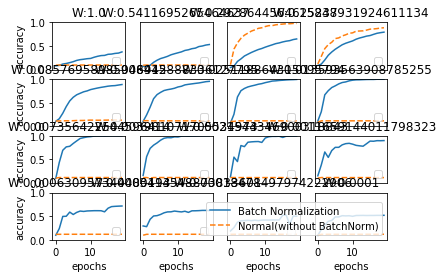

In [16]:
#배치정규화
#1. 속도개선
#2. 초깃값에 크게 의존하지 않는다
#3. 오버피팅을 억제한다

from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

#실선 : 배치정규화를 사용
#점선 : 사용하지 않은 경우

epoch:0, train acc:0.10666666666666667, test acc:0.1026
epoch:1, train acc:0.12666666666666668, test acc:0.1133
epoch:2, train acc:0.13666666666666666, test acc:0.1188
epoch:3, train acc:0.14666666666666667, test acc:0.1245
epoch:4, train acc:0.18, test acc:0.1334
epoch:5, train acc:0.19666666666666666, test acc:0.1491
epoch:6, train acc:0.23333333333333334, test acc:0.1673
epoch:7, train acc:0.27, test acc:0.1882
epoch:8, train acc:0.30333333333333334, test acc:0.1988
epoch:9, train acc:0.32, test acc:0.2201
epoch:10, train acc:0.36333333333333334, test acc:0.2512
epoch:11, train acc:0.3933333333333333, test acc:0.2708
epoch:12, train acc:0.44333333333333336, test acc:0.3004
epoch:13, train acc:0.47333333333333333, test acc:0.3446
epoch:14, train acc:0.48, test acc:0.3461
epoch:15, train acc:0.49666666666666665, test acc:0.3631
epoch:16, train acc:0.52, test acc:0.3776
epoch:17, train acc:0.57, test acc:0.4118
epoch:18, train acc:0.56, test acc:0.4264
epoch:19, train acc:0.58, test ac

epoch:160, train acc:0.8833333333333333, test acc:0.732
epoch:161, train acc:0.8766666666666667, test acc:0.736
epoch:162, train acc:0.8766666666666667, test acc:0.7323
epoch:163, train acc:0.8766666666666667, test acc:0.734
epoch:164, train acc:0.8766666666666667, test acc:0.7342
epoch:165, train acc:0.8766666666666667, test acc:0.7349
epoch:166, train acc:0.88, test acc:0.7385
epoch:167, train acc:0.8766666666666667, test acc:0.7373
epoch:168, train acc:0.8733333333333333, test acc:0.7398
epoch:169, train acc:0.88, test acc:0.7341
epoch:170, train acc:0.8766666666666667, test acc:0.7372
epoch:171, train acc:0.8833333333333333, test acc:0.7364
epoch:172, train acc:0.88, test acc:0.735
epoch:173, train acc:0.88, test acc:0.7372
epoch:174, train acc:0.88, test acc:0.7392
epoch:175, train acc:0.88, test acc:0.7371
epoch:176, train acc:0.8833333333333333, test acc:0.7333
epoch:177, train acc:0.8833333333333333, test acc:0.7344
epoch:178, train acc:0.88, test acc:0.7368
epoch:179, train ac

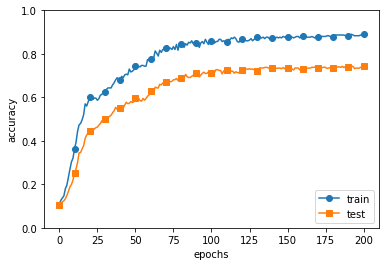

In [17]:
#오버피팅 : 훈련데이터에'만' 지나치게 적응되어버리는 상태

from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.09, test acc:0.1084
epoch:1, train acc:0.10333333333333333, test acc:0.116
epoch:2, train acc:0.12, test acc:0.1281
epoch:3, train acc:0.13666666666666666, test acc:0.1422
epoch:4, train acc:0.17666666666666667, test acc:0.1662
epoch:5, train acc:0.21666666666666667, test acc:0.1772
epoch:6, train acc:0.30666666666666664, test acc:0.218
epoch:7, train acc:0.3433333333333333, test acc:0.2397
epoch:8, train acc:0.38333333333333336, test acc:0.2565
epoch:9, train acc:0.4033333333333333, test acc:0.2844
epoch:10, train acc:0.44, test acc:0.3091
epoch:11, train acc:0.4666666666666667, test acc:0.3304
epoch:12, train acc:0.49, test acc:0.3655
epoch:13, train acc:0.5066666666666667, test acc:0.3896
epoch:14, train acc:0.55, test acc:0.4153
epoch:15, train acc:0.57, test acc:0.4293
epoch:16, train acc:0.5733333333333334, test acc:0.4433
epoch:17, train acc:0.5733333333333334, test acc:0.4537
epoch:18, train acc:0.6, test acc:0.4633
epoch:19, train acc:0.6133333333333333, t

epoch:169, train acc:1.0, test acc:0.7728
epoch:170, train acc:1.0, test acc:0.7726
epoch:171, train acc:1.0, test acc:0.7728
epoch:172, train acc:1.0, test acc:0.7739
epoch:173, train acc:1.0, test acc:0.7735
epoch:174, train acc:1.0, test acc:0.7738
epoch:175, train acc:1.0, test acc:0.7742
epoch:176, train acc:1.0, test acc:0.774
epoch:177, train acc:1.0, test acc:0.7745
epoch:178, train acc:1.0, test acc:0.7747
epoch:179, train acc:1.0, test acc:0.7724
epoch:180, train acc:1.0, test acc:0.774
epoch:181, train acc:1.0, test acc:0.7744
epoch:182, train acc:1.0, test acc:0.7745
epoch:183, train acc:1.0, test acc:0.7759
epoch:184, train acc:1.0, test acc:0.775
epoch:185, train acc:1.0, test acc:0.7747
epoch:186, train acc:1.0, test acc:0.7743
epoch:187, train acc:1.0, test acc:0.776
epoch:188, train acc:1.0, test acc:0.7753
epoch:189, train acc:1.0, test acc:0.7755
epoch:190, train acc:1.0, test acc:0.7754
epoch:191, train acc:1.0, test acc:0.775
epoch:192, train acc:1.0, test acc:0.77

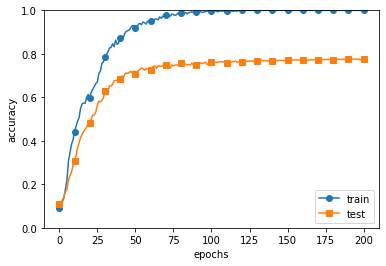

In [18]:
#오버피팅 감소용으로 자주 쓰이는 방법 중 하나가 "가중치 감소"
#큰 가중치에 큰 패널티를 부여한다.
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ====================================================

# 아! 잘못 생각했구나
# 감쇠가 설정되어 있지 않아서  아래처럼 test가 100%를 찍지만
# 감쇠가 설정된 윗부분은 80% 까지 떨어진다.
# 근데 어큐레시에서 차이가 좀 큰거 아닌가?

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [19]:
#드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법
#Train : 데이터를 흘를때마다 삭제할 뉴런을 무작위로 선택
#Test : 모든 뉴런에 신호를 전달
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self,dout):
        return dout * self.mask

train loss:2.3269803633408714
=== epoch:1, train acc:0.12333333333333334, test acc:0.1006 ===
train loss:2.3168664791144553
train loss:2.3104656960673253
train loss:2.3077020259527266
=== epoch:2, train acc:0.12666666666666668, test acc:0.1027 ===
train loss:2.3119354620937775
train loss:2.32171723888882
train loss:2.313679194231937
=== epoch:3, train acc:0.12666666666666668, test acc:0.1041 ===
train loss:2.3147851596561058
train loss:2.306360785129854
train loss:2.306261093360385
=== epoch:4, train acc:0.13, test acc:0.1055 ===
train loss:2.311394725877708
train loss:2.3091859699037682
train loss:2.3108630004788324
=== epoch:5, train acc:0.13, test acc:0.1061 ===
train loss:2.2851160555534396
train loss:2.309944883295768
train loss:2.3098262250165713
=== epoch:6, train acc:0.13, test acc:0.1068 ===
train loss:2.2818379521434706
train loss:2.315925148399723
train loss:2.2961508580021195
=== epoch:7, train acc:0.14, test acc:0.1079 ===
train loss:2.293244731809394
train loss:2.30915783

=== epoch:57, train acc:0.32666666666666666, test acc:0.268 ===
train loss:2.2229461688472956
train loss:2.2476002977125815
train loss:2.2298453198990047
=== epoch:58, train acc:0.3233333333333333, test acc:0.2705 ===
train loss:2.2398772876170745
train loss:2.2367093645601956
train loss:2.234632771584981
=== epoch:59, train acc:0.32666666666666666, test acc:0.2712 ===
train loss:2.2381475688623924
train loss:2.2265194331391585
train loss:2.2371339205104457
=== epoch:60, train acc:0.3233333333333333, test acc:0.2764 ===
train loss:2.216202178499613
train loss:2.258938368834196
train loss:2.2230088127834673
=== epoch:61, train acc:0.3233333333333333, test acc:0.2762 ===
train loss:2.2276957739953884
train loss:2.2311465249245606
train loss:2.2397013203449925
=== epoch:62, train acc:0.33, test acc:0.2791 ===
train loss:2.2072034651050343
train loss:2.216930570238907
train loss:2.2430924008220963
=== epoch:63, train acc:0.32666666666666666, test acc:0.2761 ===
train loss:2.230220527033546

=== epoch:113, train acc:0.49666666666666665, test acc:0.3772 ===
train loss:2.1070092255280506
train loss:2.1413994632576063
train loss:2.0937154688796316
=== epoch:114, train acc:0.5, test acc:0.3777 ===
train loss:2.1096448495716844
train loss:2.112755257928129
train loss:2.099181176513468
=== epoch:115, train acc:0.51, test acc:0.3841 ===
train loss:2.0820797605968138
train loss:2.050280999036778
train loss:2.109439808301105
=== epoch:116, train acc:0.5033333333333333, test acc:0.38 ===
train loss:2.0898479999197868
train loss:2.0911759701395836
train loss:2.096935464955464
=== epoch:117, train acc:0.5133333333333333, test acc:0.3803 ===
train loss:2.0465843379923934
train loss:2.0917808261957824
train loss:2.083487766996181
=== epoch:118, train acc:0.4866666666666667, test acc:0.3779 ===
train loss:2.083859095561549
train loss:2.096335130407563
train loss:2.0681173894735885
=== epoch:119, train acc:0.5033333333333333, test acc:0.3835 ===
train loss:2.065048815257784
train loss:2.0

=== epoch:168, train acc:0.5366666666666666, test acc:0.4408 ===
train loss:1.8276816182607565
train loss:1.683846351032633
train loss:1.7880462320002082
=== epoch:169, train acc:0.5133333333333333, test acc:0.4349 ===
train loss:1.7328454918290441
train loss:1.8391197751482184
train loss:1.7199260375676264
=== epoch:170, train acc:0.51, test acc:0.4326 ===
train loss:1.7391934485189438
train loss:1.855602919476115
train loss:1.8622472772581073
=== epoch:171, train acc:0.5066666666666667, test acc:0.4299 ===
train loss:1.7122632077620563
train loss:1.7323925258498383
train loss:1.7284463469313098
=== epoch:172, train acc:0.5066666666666667, test acc:0.4305 ===
train loss:1.7095862690703634
train loss:1.7521697618276804
train loss:1.8063540870859376
=== epoch:173, train acc:0.5133333333333333, test acc:0.4281 ===
train loss:1.700118462406327
train loss:1.698005164175431
train loss:1.7245763020883123
=== epoch:174, train acc:0.5133333333333333, test acc:0.4277 ===
train loss:1.7276176383

=== epoch:223, train acc:0.6166666666666667, test acc:0.5093 ===
train loss:1.4381945381780548
train loss:1.2715659349742598
train loss:1.1683669294367465
=== epoch:224, train acc:0.62, test acc:0.515 ===
train loss:1.337021435098896
train loss:1.3056132973452024
train loss:1.4219364937942087
=== epoch:225, train acc:0.6466666666666666, test acc:0.5201 ===
train loss:1.3904463787269117
train loss:1.2520157565921586
train loss:1.4598791837550757
=== epoch:226, train acc:0.63, test acc:0.5176 ===
train loss:1.250773795140448
train loss:1.334860636262852
train loss:1.2438149231111482
=== epoch:227, train acc:0.64, test acc:0.522 ===
train loss:1.2393600187459213
train loss:1.3164706388767966
train loss:1.2909266903929761
=== epoch:228, train acc:0.63, test acc:0.5229 ===
train loss:1.3090208637953409
train loss:1.2112573688286794
train loss:1.2417107576447557
=== epoch:229, train acc:0.6466666666666666, test acc:0.5362 ===
train loss:1.3192313007106151
train loss:1.1904519768274968
train 

=== epoch:278, train acc:0.7566666666666667, test acc:0.6088 ===
train loss:0.9367264997360358
train loss:0.9235671541438301
train loss:0.9546327342038324
=== epoch:279, train acc:0.7566666666666667, test acc:0.6055 ===
train loss:1.0197485920682514
train loss:1.0725965775079365
train loss:0.7966852378262372
=== epoch:280, train acc:0.7566666666666667, test acc:0.6107 ===
train loss:0.7720872328703267
train loss:0.9302311939105791
train loss:1.09645261082063
=== epoch:281, train acc:0.7633333333333333, test acc:0.6125 ===
train loss:0.917715167530857
train loss:0.8742816904266791
train loss:0.9632266288151125
=== epoch:282, train acc:0.7533333333333333, test acc:0.6081 ===
train loss:0.9859277108771449
train loss:1.0411931000311077
train loss:0.8348188309427385
=== epoch:283, train acc:0.76, test acc:0.611 ===
train loss:1.0082305667903722
train loss:0.9597886549074431
train loss:0.909271750217988
=== epoch:284, train acc:0.7566666666666667, test acc:0.6132 ===
train loss:0.83318017152

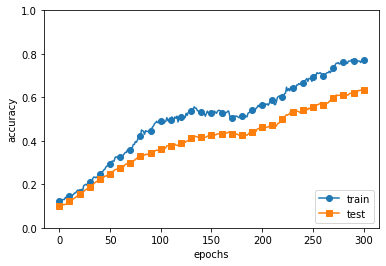

In [20]:
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#test와 train의 정확도 차이가 많이 줄어들었음을 확인할 수 있다
#어큐레시가 하락한 것은 어떻게 해결했을까?

In [23]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

(x_train, t_train), (x_test, t_test) = load_mnist()

#훈련 데이터를 뒤섞자
x_train, t_train = shuffle_dataset(x_train, t_train)

#20%를 검증데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[:validation_num]
t_train = t_train[:validation_num]

In [24]:
#하이퍼 파라미터 최적화
#0단계
# 하이퍼파라미터의 값 범위를 설정
#1단계
# 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출
#2단계
# 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가
#3단계
# 1단계와 2단계를 특정횟수 반복해 그 정확도의 결과를 보고 하이퍼 파라미터의 범위를 좁힙니다.

val acc:0.11 | lr:0.00063291989237784, weight decay:1.4347323996799478e-07
val acc:0.07 | lr:2.2384306055570533e-06, weight decay:9.261629820323294e-06
val acc:0.12 | lr:5.4342991195767366e-05, weight decay:1.1455930358760829e-08
val acc:0.07 | lr:1.98810634691825e-05, weight decay:2.221533265938101e-07
val acc:0.1 | lr:2.23483056105339e-06, weight decay:1.7840674503317319e-06
val acc:0.07 | lr:2.6201213323540366e-05, weight decay:3.857313450874508e-08
val acc:0.57 | lr:0.004214179968017547, weight decay:1.881822774353273e-05
val acc:0.11 | lr:0.00016216362356654977, weight decay:4.637560471474255e-05
val acc:0.71 | lr:0.0066807126363561615, weight decay:9.889082064262171e-06
val acc:0.11 | lr:1.6385001375398717e-06, weight decay:1.7574717144540054e-08
val acc:0.16 | lr:7.833248295786403e-06, weight decay:4.955610078963659e-06
val acc:0.17 | lr:8.635173287909079e-05, weight decay:7.719905623241542e-08
val acc:0.16 | lr:0.0007279180062690372, weight decay:2.502995667343939e-05
val acc:0

Best-8(val acc:0.62) | lr:0.004069119257490888, weight decay:1.1278140701542674e-08
Best-9(val acc:0.57) | lr:0.004214179968017547, weight decay:1.881822774353273e-05
Best-10(val acc:0.57) | lr:0.0039989637375907085, weight decay:5.228721020307814e-05
Best-11(val acc:0.56) | lr:0.004361312752378372, weight decay:3.31458218942802e-08
Best-12(val acc:0.55) | lr:0.002918905045197047, weight decay:6.292123477509614e-07
Best-13(val acc:0.41) | lr:0.002685472495536942, weight decay:9.593670984430227e-07
Best-14(val acc:0.41) | lr:0.002379917284489736, weight decay:1.5286058840214043e-06
Best-15(val acc:0.4) | lr:0.0024658593805206514, weight decay:2.273147788838222e-08
Best-16(val acc:0.37) | lr:0.0026988743089347254, weight decay:7.657521842952329e-06
Best-17(val acc:0.37) | lr:0.0014251223322111343, weight decay:1.5214503718093548e-05
Best-18(val acc:0.36) | lr:0.001470679377901733, weight decay:8.12917311426325e-08
Best-19(val acc:0.32) | lr:0.0013287757829947599, weight decay:2.896817103

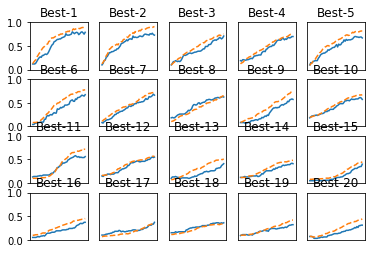

In [25]:
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()